In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
alpha = np.arange(0.5, 1.05, 0.05)
print(alpha, 'Length = {}'.format(len(alpha)))

[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] Length = 11


In [3]:
np.random.seed(seed=42)
data = np.random.choice((0,1), size=(1000000, 20), p=(0.5, 0.5))

### Empirical frequency

In [4]:
def count(t):
    return np.sum(t == 1)

def getEmpFreq(inp):
    #Count of tails per 20 throw
    x = np.apply_along_axis(count, 1, inp)
    
    #Get the freqency
    map_ = lambda t: t / 20 
    return map_(x).cumsum()

def alphaCheck(inp, a):
    print(inp)
    lst = []
    for elm in a:
        map_ = lambda t : t >= elm
        boolLst = map_(inp)
        freq = (np.sum(boolLst == True))/1000000
        lst.append(freq)
    return lst

empFreqLst = alphaCheck(getEmpFreq(data), alpha)
    

[0.45 0.45 0.5  ... 0.6  0.65 0.3 ]


[0.58898, 0.413312, 0.131803, 0.057473, 0.020616, 0.005805, 0.001253, 0.0002, 2e-05, 2e-06, 0.0] 11
[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] 11


Text(0.5, 0, 'Alpha')

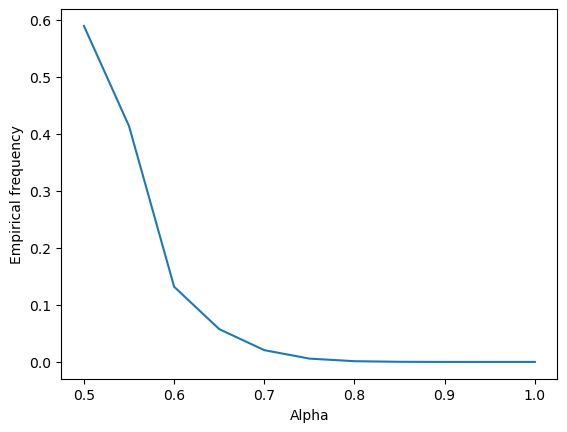

In [5]:
print(empFreqLst, len(empFreqLst))
print(alpha, len(alpha))
plt.plot(alpha, empFreqLst) # density=False would make counts
plt.ylabel('Empirical frequency')
plt.xlabel('Alpha')

### Markov's bound

https://www.probabilitycourse.com/chapter6/6_2_2_markov_chebyshev_inequalities.php
E(X) = P for binomial distribution

In [6]:
def getMarkBound(a, p):
    lst = []
    for elm in a:
        lst.append(p/elm)
    return lst

markovsBound = getMarkBound(alpha, 0.5)
print(markovsBound)

[1.0, 0.9090909090909091, 0.8333333333333333, 0.769230769230769, 0.7142857142857141, 0.6666666666666665, 0.6249999999999998, 0.5882352941176469, 0.5555555555555554, 0.526315789473684, 0.4999999999999998]


[0.58898, 0.413312, 0.131803, 0.057473, 0.020616, 0.005805, 0.001253, 0.0002, 2e-05, 2e-06, 0.0] 11
[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] 11


Text(0.5, 0, 'Alpha')

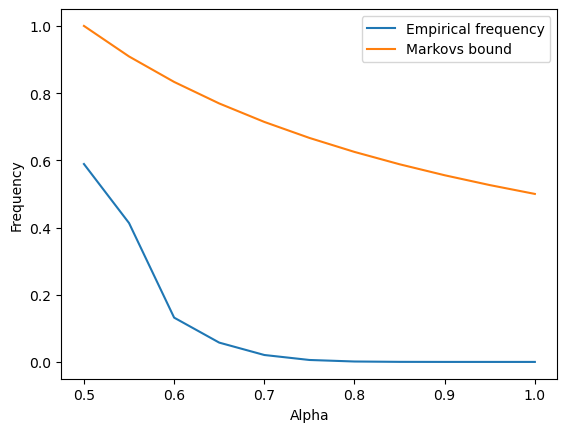

In [7]:
print(empFreqLst, len(empFreqLst))
print(alpha, len(alpha))
plt.plot(alpha, empFreqLst, label = 'Empirical frequency')
plt.plot(alpha, markovsBound, label = 'Markovs bound')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Alpha')

### Chebyshev's bound

In [8]:
def checkProb(inp):
    if inp > 1: return 1
    else: return inp

def getChebBound(a, p):
    lst = []
    q = 1-p
    for elm in a:
        bound = (p*q)/(20 * (elm-p)**2) # pq / (samplesize * (a - bias)^2)
        lst.append(bound)
    lst = list(map(checkProb, lst))
    return lst
    
chebyshevBound = getChebBound(alpha, 0.5)
print(chebyshevBound)

[1, 1, 1, 0.5555555555555545, 0.31249999999999944, 0.19999999999999965, 0.13888888888888862, 0.10204081632653042, 0.07812499999999986, 0.06172839506172829, 0.04999999999999991]


C:\Users\alx26\AppData\Local\Temp\ipykernel_17820\2827990238.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  bound = (p*q)/(20 * (elm-p)**2) # pq / (samplesize * (a - bias)^2)


Text(0.5, 0, 'Alpha')

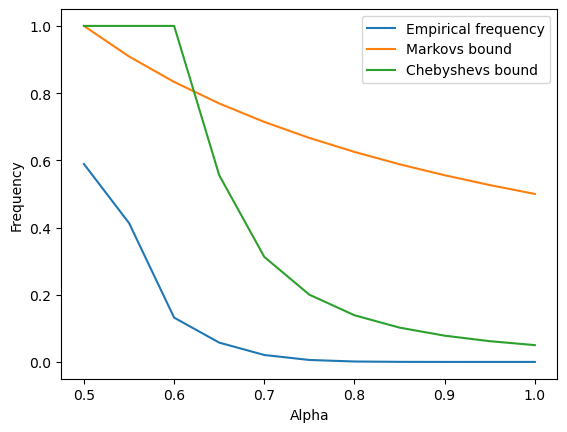

In [9]:
plt.plot(alpha, empFreqLst, label = 'Empirical frequency')
plt.plot(alpha, markovsBound, label = 'Markovs bound')
plt.plot(alpha, chebyshevBound, label = 'Chebyshevs bound')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Alpha')

### Hoeffding's inequality

exp(-2 (epsilon)^2n)

In [10]:
def getHoefBound(a, p):
    lst = []
    bound = np.exp((-2) * (a-p)**2 * 20)
    return bound

HoeffdingBound = (getHoefBound(alpha, 0.5))

Text(0.5, 0, 'Alpha')

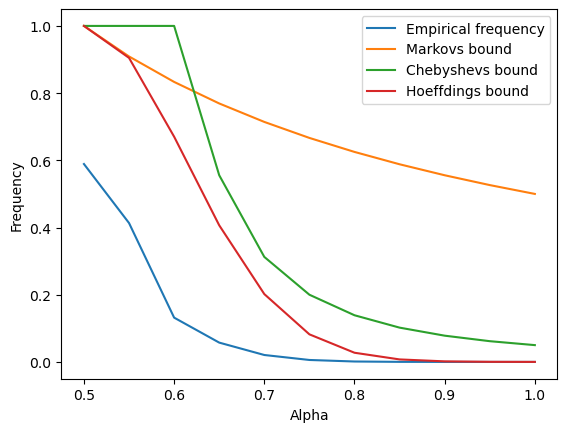

In [11]:
plt.plot(alpha, empFreqLst, label = 'Empirical frequency')
plt.plot(alpha, markovsBound, label = 'Markovs bound')
plt.plot(alpha, chebyshevBound, label = 'Chebyshevs bound')
plt.plot(alpha, HoeffdingBound, label = 'Hoeffdings bound')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Alpha')

In [12]:
print('for alpha = [0.95, 1] ', empFreqLst[9:11])

for alpha = [0.95, 1]  [2e-06, 0.0]


# Repeat with bias 0.1

[0.   0.   0.1  ... 0.1  0.   0.05]
[0.607605, 0.132778, 0.042638, 0.011297, 0.002314, 0.000409, 5.8e-05, 1.1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\alx26\AppData\Local\Temp\ipykernel_17820\2827990238.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  bound = (p*q)/(20 * (elm-p)**2) # pq / (samplesize * (a - bias)^2)


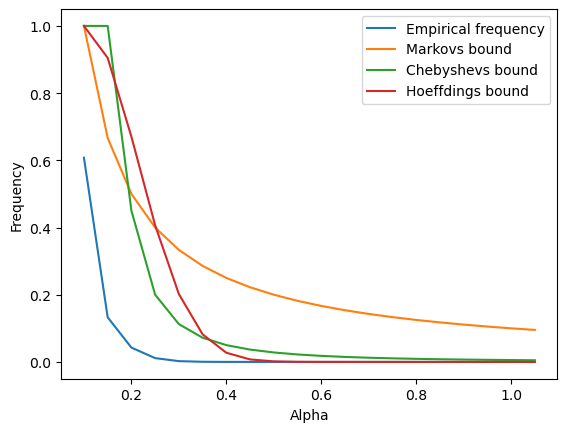

In [13]:
def runAll(bias):
    data = np.random.choice((0,1), size=(1000000, 20), p=(1-bias, bias))
    alpha = np.arange(0.1, 1.1, 0.05)

    empFreqLst = alphaCheck(getEmpFreq(data), alpha)
    print(empFreqLst)
    markovsBound = getMarkBound(alpha, bias)
    chebyshevBound = getChebBound(alpha, bias)
    HoeffdingBound = getHoefBound(alpha, bias)
    
    plt.plot(alpha, empFreqLst, label = 'Empirical frequency')
    plt.plot(alpha, markovsBound, label = 'Markovs bound')
    plt.plot(alpha, chebyshevBound, label = 'Chebyshevs bound')
    plt.plot(alpha, HoeffdingBound, label = 'Hoeffdings bound')
    plt.legend()
    plt.ylabel('Frequency')
    plt.xlabel('Alpha')
    plt.show()
runAll(0.1)
